## Artem Kolmogorov ## 

## Task ##
In this project, you will dive into the realm of Natural Language Processing (NLP) by building a deep learning model for sentiment analysis. The objective is to create a Recurrent Neural Network (RNN) that can effectively analyze and classify the sentiment of movie reviews. This project will provide you with hands-on experience in text preprocessing, designing an RNN architecture, training the model, and evaluating its performance.
Choose a suitable dataset for sentiment analysis. You can use well-known datasets like the IMDB movie reviews dataset, Amazon reviews dataset, or select a domain-specific dataset based on your interest.
Preprocess the text data by tokenizing, removing stop words, and handling issues such as punctuation and capitalization. Split the dataset into training and testing sets.
Design a Recurrent Neural Network (RNN) architecture for sentiment analysis. Experiment with different architectures, including the number of layers, types of recurrent layers, and activation functions.
Train your RNN model using the training dataset. Experiment with hyperparameters such as learning rate, batch size, and epochs. Monitor the training process and analyze the loss and accuracy trends.

Evaluate the trained model using the testing dataset. Calculate key metrics such as accuracy, precision, recall, and F1 score. Examine misclassifications to understand areas for improvement.
Experiment with model fine-tuning and optimization techniques. Consider using techniques like dropout, bidirectional RNNs, or adjusting the model architecture to improve performance.
Explore the use of pre-trained word embeddings (e.g., Word2Vec, GloVe). Integrate these embeddings into your model and compare the results with your initial model.

## Preparing the data ##
We start with importing libraries that will allow us to prep data for our models. NLTK libraries allow for downloading stopwords and punctuation libraries that we are going to use to remove from dataset to make sure they do not affect our restuls

In [4]:
import os
import pandas as pd
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
nltk.download('punkt')
nltk.download('stopwords')

We use the IMDB Movie reiview dataset from Kaggle that has 50 000 movie reviews which is split into 25 000 positive and 25 000 negative reviews. 

In [8]:
df = pd.read_csv("IMDB Dataset.csv")
df.head()

In [10]:
df.tail()

,review,sentiment
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative
49999,No one expects the Star Trek movies to be high...,negative


Both from describe and info we can see that dataset is separated into review themselves and sentiment. However, we can spot that there might be not unique reviews. What might be happenning is that some of the reveiws are as short as 

In [12]:
df.describe().T

,count,unique,top,freq
review,50000,49582,Loved today's show!!! It was a variety and not...,5
sentiment,50000,2,positive,25000


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


From this we see that it is not the case.

In [27]:
df['word_count'] = df['review'].apply(lambda x: len(str(x).split()))

reviews_less_than_5_words = df[df['word_count'] < 5]

print(f"Number of reviews with less than 5 words: {len(reviews_less_than_5_words)}")
print("\nReviews with less than 5 words:")
print(reviews_less_than_5_words[['review', 'word_count']])


Number of reviews with less than 5 words: 4

Reviews with less than 5 words:
                                                 review  word_count
19874                       movie terrible good effects           4
27521                            read book forget movie           4
28920  primary plotprimary directionpoor interpretation           4
31072                                 script story mess           3


One of the most important part of preprocessing the data is lowercasing the letter, we remove punctuation, tokenize the text and remove stopwords from the library that we loaded earlier. Having preprocessed the data we create a copies of data. 

In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string


def preprocessing(text):

    text = text.lower()

    text = text.translate(str.maketrans('', '', string.punctuation))

    tokens = word_tokenize(text)

    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    text = ' '.join(tokens)

    return text

df['review'] = df['review'].apply(preprocessing)


X_train, X_test, y_train, y_test = train_test_split(df['review'], df['sentiment'], test_size=0.2, random_state=42)

print("Preprocessed text:")
print(X_train.head())

X_train.to_csv('X_train.csv', index=False)
X_test.to_csv('X_test.csv', index=False)
y_train.to_csv('y_train.csv', index=False)
y_test.to_csv('y_test.csv', index=False)


Preprocessed text:
39087    thats kept asking many fights screaming matche...
30893    watch entire movie could watch entire movie st...
45278    touching love story reminiscent in mood love ...
16398    latterday fulci schlocker totally abysmal conc...
13653    first firmly believe norwegian movies continua...
Name: review, dtype: object


## SIMPLE RNN ##
Following preprocessing data, we split the data set into testing and training data with 80 to 20 ratio. We tokenize text and encode the sentiment into numerical data. After that we create a model with embedding layer followed by two SimpleRNN layers and a Dense layer with a sigmoid activation function. After we fit model with batch size of 64 and 5 epochs

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 200, 50)           500000    
                                                                 
 simple_rnn_4 (SimpleRNN)    (None, 200, 50)           5050      
                                                                 
 simple_rnn_5 (SimpleRNN)    (None, 50)                5050      
                                                                 
 dense_5 (Dense)             (None, 1)                 51        
                                                                 
Total params: 510151 (1.95 MB)
Trainable params: 510151 (1.95 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/5
625/625 [==============================] - 26s 39ms/step - loss: 0.4455 - accuracy: 0.7748 - val_loss: 0.3360 - val_accuracy: 0.8571
Epoch 2

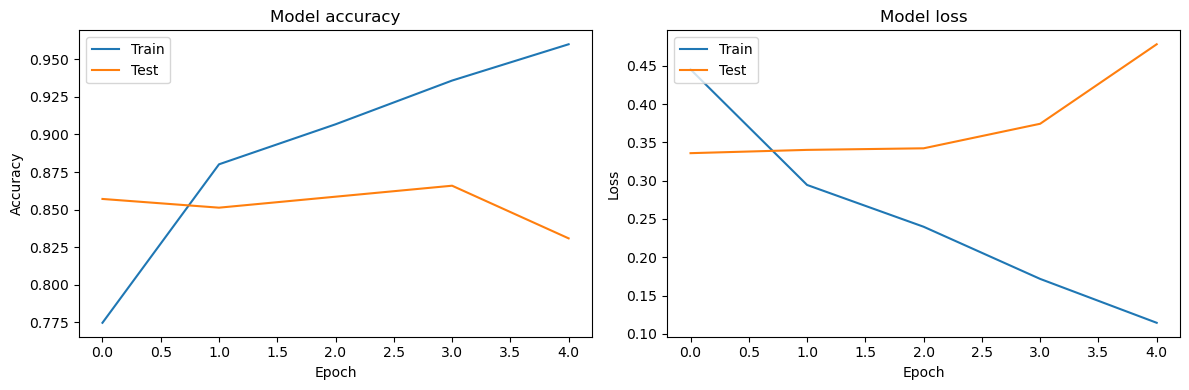

In [30]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, Flatten
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder



df['review'] = df['review'].apply(preprocessing)

X_train, X_test, y_train, y_test = train_test_split(df['review'], df['sentiment'], test_size=0.2, random_state=42)


max_words = 10000
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)


max_len = 200
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)


label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)


model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=50, input_length=max_len))
model.add(SimpleRNN(50, activation='tanh', return_sequences=True))
model.add(SimpleRNN(50, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))


model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


model.summary()


batch_size = 64
epochs = 5
history = model.fit(X_train_pad, y_train_encoded, validation_data=(X_test_pad, y_test_encoded), batch_size=batch_size, epochs=epochs)


loss, accuracy = model.evaluate(X_test_pad, y_test_encoded)
print(f'Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}')

def plot_history(history):
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Test'], loc='upper left')

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Test'], loc='upper left')

    plt.tight_layout()
    plt.show()
plot_history(history)

From the fitting and evaluation of the model we get accuracy of 80% which can be improved. Next we attempt to build similar model but with addition of optimizer and increasing the number of epochs. 

Epoch 1/10
625/625 [==============================] - 27s 41ms/step - loss: 0.4351 - accuracy: 0.7811 - val_loss: 0.4236 - val_accuracy: 0.8196
Epoch 2/10
625/625 [==============================] - 25s 41ms/step - loss: 0.2775 - accuracy: 0.8884 - val_loss: 0.2830 - val_accuracy: 0.8834
Epoch 3/10
625/625 [==============================] - 26s 41ms/step - loss: 0.1872 - accuracy: 0.9301 - val_loss: 0.3420 - val_accuracy: 0.8814
Epoch 4/10
625/625 [==============================] - 25s 40ms/step - loss: 0.1045 - accuracy: 0.9630 - val_loss: 0.4082 - val_accuracy: 0.8651
Epoch 5/10
625/625 [==============================] - 24s 39ms/step - loss: 0.0548 - accuracy: 0.9809 - val_loss: 0.5748 - val_accuracy: 0.8402
Epoch 6/10
625/625 [==============================] - 24s 39ms/step - loss: 0.0369 - accuracy: 0.9880 - val_loss: 0.6038 - val_accuracy: 0.8606
Epoch 7/10
625/625 [==============================] - 27s 44ms/step - loss: 0.0315 - accuracy: 0.9893 - val_loss: 0.6573 - val_accuracy:

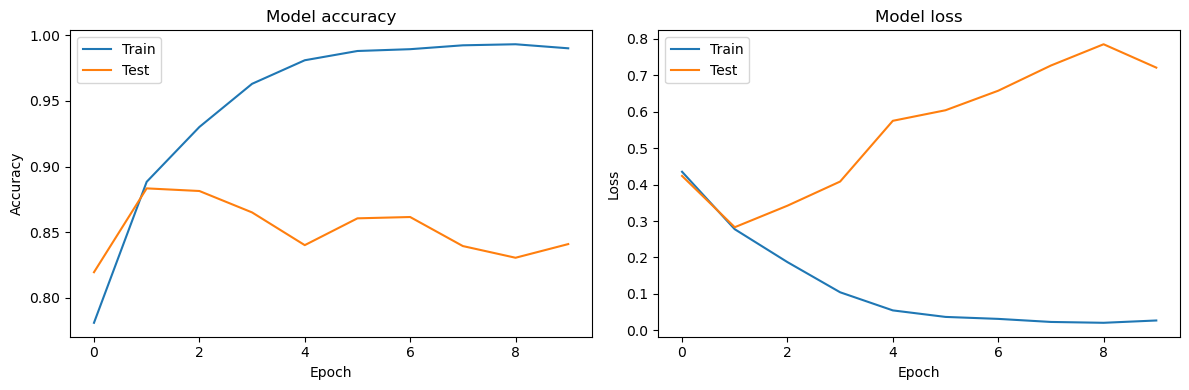

In [31]:
import matplotlib.pyplot as plt


model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=50, input_length=max_len))
model.add(SimpleRNN(50, activation='tanh', return_sequences=True))
model.add(SimpleRNN(50, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))


learning_rate = 0.001
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])


batch_size = 64
epochs = 10
history = model.fit(X_train_pad, y_train_encoded, validation_data=(X_test_pad, y_test_encoded), batch_size=batch_size, epochs=epochs, verbose=1)


loss, accuracy = model.evaluate(X_test_pad, y_test_encoded)
print(f'Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}')



plot_history(history)


We can see that by adding optimizer and increase the amount of epochs we have acheived a better accuracy.

In [32]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


y_pred = model.predict(X_test_pad)
y_pred_binary = (y_pred > 0.5).astype(int)

y_pred_labels = label_encoder.inverse_transform(y_pred_binary.flatten())

accuracy = accuracy_score(y_test, y_pred_labels)
precision = precision_score(y_test, y_pred_labels, pos_label='positive')
recall = recall_score(y_test, y_pred_labels, pos_label='positive')
f1 = f1_score(y_test, y_pred_labels, pos_label='positive')
conf_matrix = confusion_matrix(y_test, y_pred_labels)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print('\nConfusion Matrix:')
print(conf_matrix)


313/313 [==============================] - 3s 9ms/step
Accuracy: 0.8410
Precision: 0.8426
Recall: 0.8416
F1 Score: 0.8421

Confusion Matrix:
[[4169  792]
 [ 798 4241]]


## Bidrectional LSTM ##
Now we devise a better model by going Bidirectional LSTM route with two drop out layers at 0.2 with optimizer. 

Epoch 1/10
625/625 [==============================] - 85s 127ms/step - loss: 0.3368 - accuracy: 0.8481 - val_loss: 0.2640 - val_accuracy: 0.8903
Epoch 2/10
625/625 [==============================] - 69s 110ms/step - loss: 0.2021 - accuracy: 0.9230 - val_loss: 0.3159 - val_accuracy: 0.8883
Epoch 3/10
625/625 [==============================] - 69s 111ms/step - loss: 0.1449 - accuracy: 0.9477 - val_loss: 0.3112 - val_accuracy: 0.8837
Epoch 4/10
625/625 [==============================] - 70s 112ms/step - loss: 0.1069 - accuracy: 0.9632 - val_loss: 0.3591 - val_accuracy: 0.8769
Epoch 5/10
625/625 [==============================] - 70s 112ms/step - loss: 0.0869 - accuracy: 0.9710 - val_loss: 0.4247 - val_accuracy: 0.8753
Epoch 6/10
625/625 [==============================] - 68s 108ms/step - loss: 0.0664 - accuracy: 0.9779 - val_loss: 0.5052 - val_accuracy: 0.8721
Epoch 7/10
625/625 [==============================] - 66s 106ms/step - loss: 0.0500 - accuracy: 0.9854 - val_loss: 0.4901 - val_ac

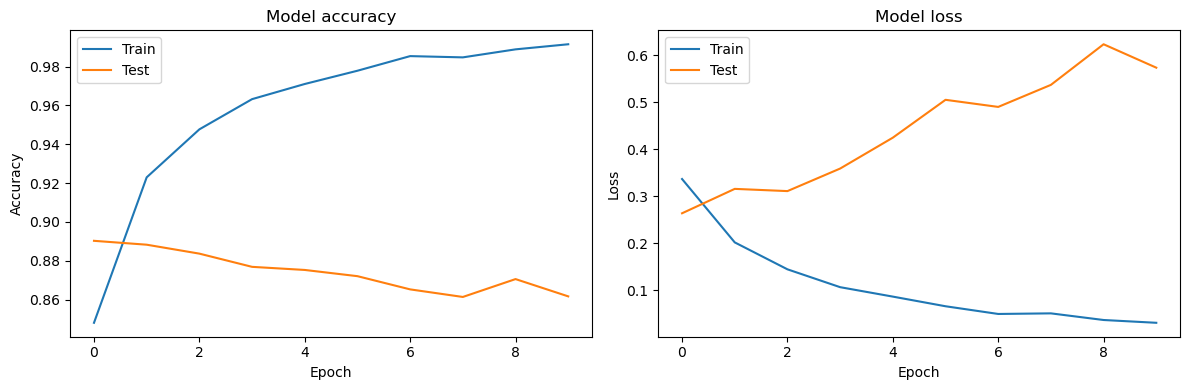

In [33]:
from tensorflow.keras.layers import Bidirectional, LSTM, Dropout

model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=50, input_length=max_len))
model.add(Bidirectional(LSTM(50, activation='tanh', return_sequences=True)))
model.add(Dropout(0.2))  # Add dropout to prevent overfitting
model.add(Bidirectional(LSTM(50, activation='tanh')))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

learning_rate = 0.001
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train_pad, y_train_encoded, validation_data=(X_test_pad, y_test_encoded), batch_size=batch_size, epochs=epochs, verbose=1)

loss, accuracy = model.evaluate(X_test_pad, y_test_encoded)
print(f'Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}')


plot_history(history)


## Glove ## 
Now we implement model using a Bidirectional Long Short-Term Memory (LSTM) neural network with pre-trained word embeddings from GloVe. The model uses  pre-trained embedding matrix and consists of Bidirectional LSTMs, dropout layers for regularization, and a Dense layer with a sigmoid activation function for binary classification. The model is compiled with the Adam optimizer, binary crossentropy loss, and accuracy metric. We expect a better results from this model.

Epoch 1/10
625/625 [==============================] - 65s 97ms/step - loss: 0.4509 - accuracy: 0.7880 - val_loss: 0.3626 - val_accuracy: 0.8405
Epoch 2/10
625/625 [==============================] - 59s 94ms/step - loss: 0.3544 - accuracy: 0.8446 - val_loss: 0.3438 - val_accuracy: 0.8518
Epoch 3/10
625/625 [==============================] - 60s 95ms/step - loss: 0.3124 - accuracy: 0.8658 - val_loss: 0.3066 - val_accuracy: 0.8682
Epoch 4/10
625/625 [==============================] - 59s 95ms/step - loss: 0.2923 - accuracy: 0.8777 - val_loss: 0.2895 - val_accuracy: 0.8750
Epoch 5/10
625/625 [==============================] - 62s 99ms/step - loss: 0.2689 - accuracy: 0.8878 - val_loss: 0.3426 - val_accuracy: 0.8503
Epoch 6/10
625/625 [==============================] - 61s 98ms/step - loss: 0.2512 - accuracy: 0.8963 - val_loss: 0.2812 - val_accuracy: 0.8849
Epoch 7/10
625/625 [==============================] - 61s 98ms/step - loss: 0.2398 - accuracy: 0.9022 - val_loss: 0.2803 - val_accuracy:

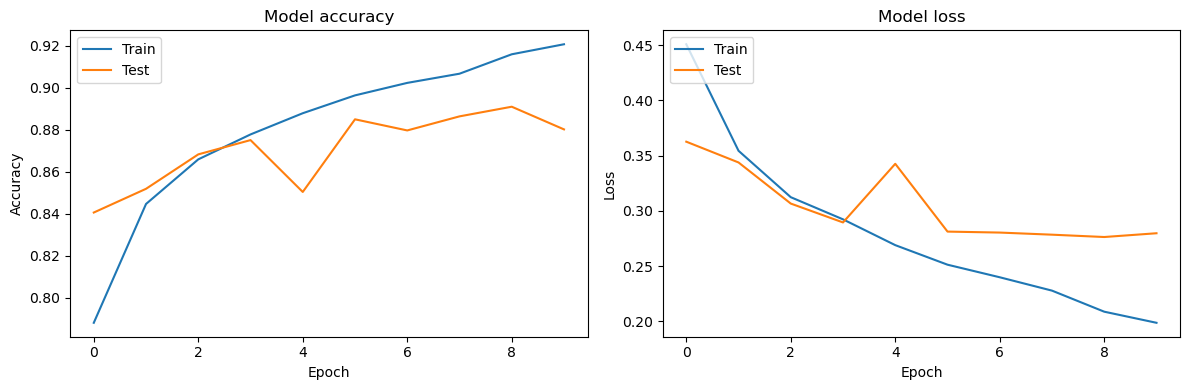

In [34]:
import numpy as np


embedding_dim = 100  
embedding_index = {}
embedding_file_path = 'glove.6B.100d.txt'

with open(embedding_file_path, 'r', encoding='utf-8') as file:
    for line in file:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embedding_index[word] = coefs


embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in tokenizer.word_index.items():
    if i < max_words:
        embedding_vector = embedding_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector


model_with_embedding = Sequential()
model_with_embedding.add(Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_len, weights=[embedding_matrix], trainable=False))
model_with_embedding.add(Bidirectional(LSTM(50, activation='tanh', return_sequences=True)))
model_with_embedding.add(Dropout(0.2))
model_with_embedding.add(Bidirectional(LSTM(50, activation='tanh')))
model_with_embedding.add(Dropout(0.2))
model_with_embedding.add(Dense(1, activation='sigmoid'))
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)


model_with_embedding.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])


history_with_embedding = model_with_embedding.fit(X_train_pad, y_train_encoded, validation_data=(X_test_pad, y_test_encoded), batch_size=batch_size, epochs=epochs, verbose=1)


loss_with_embedding, accuracy_with_embedding = model_with_embedding.evaluate(X_test_pad, y_test_encoded)
print(f'Test Loss (with embedding): {loss_with_embedding:.4f}, Test Accuracy (with embedding): {accuracy_with_embedding:.4f}')


plot_history(history_with_embedding)


In conclusion we can confidently say that Bidirectional LST model with pre-trained embedde matrix produces the best results. Increasing the number of epochs must be countered with adding dropout layers that will help to avoid overfitting of the models and produce more consistent results. 